In [1]:
import pandas as pd
import numpy as np
import statistics as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Calling the data
abalone_data = pd.read_csv('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Abalone/Abalone.csv')
abalone_data = np.array(abalone_data)
abalone_data
X = abalone_data[:,0:7]
X
Y = abalone_data[:,-1]
Y = Y
Y
#splitting it into test and train with 90% train and 10% test
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.1,shuffle=True)  
X_train,X_test,Y_train,Y_test

(array([[0.16  , 0.12  , 0.02  , ..., 0.0075, 0.0045, 0.005 ],
        [0.13  , 0.095 , 0.035 , ..., 0.005 , 0.0065, 0.0035],
        [0.495 , 0.385 , 0.135 , ..., 0.2   , 0.1225, 0.26  ],
        ...,
        [0.625 , 0.47  , 0.145 , ..., 0.475 , 0.2   , 0.265 ],
        [0.275 , 0.195 , 0.065 , ..., 0.054 , 0.02  , 0.028 ],
        [0.63  , 0.505 , 0.155 , ..., 0.492 , 0.226 , 0.325 ]]),
 array([[0.58  , 0.465 , 0.15  , ..., 0.371 , 0.1965, 0.29  ],
        [0.615 , 0.48  , 0.185 , ..., 0.4985, 0.315 , 0.33  ],
        [0.66  , 0.53  , 0.195 , ..., 0.6505, 0.3295, 0.495 ],
        ...,
        [0.335 , 0.265 , 0.105 , ..., 0.0935, 0.056 , 0.075 ],
        [0.505 , 0.405 , 0.16  , ..., 0.271 , 0.145 , 0.215 ],
        [0.65  , 0.525 , 0.19  , ..., 0.8875, 0.3095, 0.405 ]]),
 array([ 4.,  4., 14., ..., 11.,  6., 11.]),
 array([ 8., 10., 10.,  9., 18., 13., 10., 14., 15.,  9., 13.,  8., 16.,
        13.,  6., 10.,  8., 11.,  8., 13.,  5.,  7.,  4.,  9., 12.,  6.,
        11.,  8., 10., 

### For Model a

In [3]:
Train_MSE = []
Test_MSE = []
for i in range(20):
    X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,shuffle=True)  
    Y_hat = np.mean(Y_train) #Model fitted
    Y_pred_train = Y_hat
    Y_pred_test = Y_hat
    Training_MSE = np.mean((Y_train - Y_pred_train)**2)
    Train_MSE.append(Training_MSE)
    Testing_MSE = np.mean((Y_test - Y_pred_test)**2)
    Test_MSE.append(Testing_MSE)
Train_MSE
Test_MSE
Final_Train_MSE = sm.mean(Train_MSE)
print(f'The Average Train MSE is {Final_Train_MSE}')
Final_Test_MSE = sm.mean(Test_MSE)
print(f'The Average Test MSE is {Final_Test_MSE}')

The Average Train MSE is 10.424909517503828
The Average Test MSE is 10.106787551476394


### For Model b

In [5]:
#recreating the data 
#function for calculating the R2
def R2(y_true,y_pred):
    y_true_mean = np.mean(y_true)
    Regn_SS = np.sum((y_true - y_pred)**2)
    TSS = np.sum((y_true - y_true_mean)**2)
    R2 = 1 - (Regn_SS/TSS)
    return R2
    

In [7]:
Train_MSE = []
Test_MSE = []
Train_R2 = []
Test_R2 = []
logs = []

for i in range(20):
    
    X1 = np.column_stack((np.ones((X.shape[0])).reshape(X.shape[0],1),X))
    X1.shape
    Y.shape
    X_train, X_test,Y_train, Y_test = train_test_split(X1,Y,test_size=0.1,shuffle=True) 
    X_train.shape
    X_train

    lam = 0.001
    beta_hat = (np.linalg.inv(X_train.T@X_train + lam*np.identity(X_train.shape[1])))@X_train.T@Y_train
    Y_pred_train = X_train@beta_hat
    Y_pred_test = X_test@beta_hat
    Training_MSE = np.mean((Y_train - Y_pred_train)**2)
    Train_MSE.append(Training_MSE)
    Testing_MSE = np.mean((Y_test - Y_pred_test)**2)
    Test_MSE.append(Testing_MSE)
    #Training_R2 = R2(Y_train,Y_pred_train)
    Training_R2 = r2_score(Y_train,Y_pred_train)
    Train_R2.append(Training_R2)
    #Testing_R2 = R2(Y_test,Y_pred_test)
    Testing_R2 = r2_score(Y_test,Y_pred_test)
    Test_R2.append(Testing_R2)
    log_val = np.log(np.linalg.det(X_train.T@X_train + lam*np.identity(X_train.shape[1])))
    logs.append(log_val)

avg_Train_MSE = sm.mean(Train_MSE)
print(f'The Average Train MSE is {avg_Train_MSE}')
avg_Test_MSE = sm.mean(Test_MSE)
print(f'The Average Test MSE is {avg_Test_MSE}')
avg_train_R2 = sm.mean(Train_R2)
print(f'The Average Train R2 is {avg_train_R2}')
avg_Test_R2 = sm.mean(Test_R2)
print(f'The Average Test R2 is {avg_Test_R2}')
std_dev_Train_MSE = sm.stdev(Train_MSE)
print(f'The Standard deviation of Train MSE is {std_dev_Train_MSE}')
std_dev_Test_MSE = sm.stdev(Test_MSE)
print(f'The Standard deviation of Test MSE is {std_dev_Test_MSE}')
std_dev_train_R2 = sm.stdev(Train_R2)
print(f'The Standard deviation of Train R2 is {std_dev_train_R2}')
std_dev_Test_R2 = sm.stdev(Test_R2)
print(f'The Standard deviation of Test R2 is {std_dev_Test_R2}')

avg_log_val = sm.mean(logs)
print(f'The average of log determinant is {avg_log_val}')
std_dev_log_val = sm.stdev(logs)
print(f'The standard deviation of log determinant is {std_dev_log_val}')

The Average Train MSE is 4.925136229581655
The Average Test MSE is 4.784615933034296
The Average Train R2 is 0.5276025790024231
The Average Test R2 is 0.5240571734101062
The Standard deviation of Train MSE is 0.06399407416364854
The Standard deviation of Test MSE is 0.5759812265478875
The Standard deviation of Train R2 is 0.0032362481683449055
The Standard deviation of Test R2 is 0.02934728150076997
The average of log determinant is 22.39153747992857
The standard deviation of log determinant is 0.05134140332403138


### For Model c

In [76]:
avg_alldepth_Train_MSE = []
avg_alldepth_Test_MSE = []
avg_alldepth_Train_R2 = []
avg_alldepth_Test_R2 = []
null_model = []

for d in range(1,8):
    train_MSE = []
    test_MSE = []
    train_R2 = []
    test_R2 = []
    for i in range(20):
        X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.1,shuffle=True) 
        model = DecisionTreeRegressor(random_state=44,max_depth= d)
        model.fit(X_train,Y_train)
        Y_preds_train = model.predict(X_train)
        Y_preds_test = model.predict(X_test)
        training_MSE = np.mean((Y_train - Y_preds_train)**2)
        train_MSE.append(training_MSE)
        testing_MSE = np.mean((Y_test - Y_preds_test)**2)
        test_MSE.append(testing_MSE)
        training_R2 = r2_score(Y_train,Y_preds_train)
        train_R2.append(training_R2)
        testing_R2 = r2_score(Y_test,Y_preds_test)
        test_R2.append(testing_R2)
        null_model_MSE = np.mean(Y_train - np.mean(Y_train))
        null_model.append(null_model_MSE)
    avg_train_MSE = sm.mean(train_MSE)
    avg_alldepth_Train_MSE.append(avg_train_MSE)
    avg_test_MSE = sm.mean(test_MSE)
    avg_alldepth_Test_MSE.append(avg_test_MSE)
    avg_train_R2 = sm.mean(train_R2)
    avg_alldepth_Train_R2.append(avg_train_R2)
    avg_test_R2 = sm.mean(test_R2)
    avg_alldepth_Test_R2.append(avg_test_R2)
#null_model_mse = np.mean(null_model)

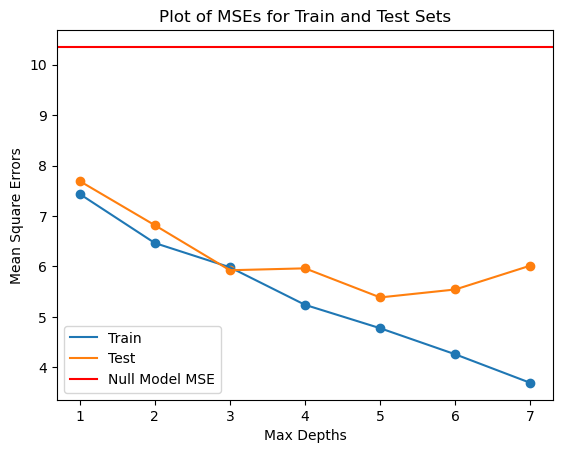

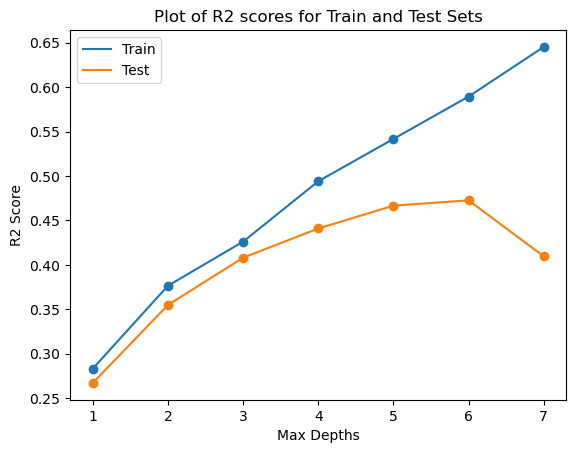

In [83]:
#Plotting the results
plt.scatter(np.arange(1,8,1),avg_alldepth_Train_MSE)
plt.plot(np.arange(1,8,1),avg_alldepth_Train_MSE,label = 'Train')
plt.scatter(np.arange(1,8,1),avg_alldepth_Test_MSE)
plt.plot(np.arange(1,8,1),avg_alldepth_Test_MSE, label = 'Test')
plt.xlabel('Max Depths')
plt.ylabel('Mean Square Errors')
plt.axhline(Final_Train_MSE,color = 'red',label = 'Null Model MSE')
plt.title('Plot of MSEs for Train and Test Sets')
plt.legend()
plt.show()

plt.scatter(np.arange(1,8,1),avg_alldepth_Train_R2)
plt.plot(np.arange(1,8,1),avg_alldepth_Train_R2,label = 'Train')
plt.scatter(np.arange(1,8,1),avg_alldepth_Test_R2)
plt.plot(np.arange(1,8,1),avg_alldepth_Test_R2, label = 'Test')
plt.xlabel('Max Depths')
plt.ylabel('R2 Score')
plt.title('Plot of R2 scores for Train and Test Sets')
plt.legend()
plt.show()

### For Model d

In [59]:
N_trees = [10,30,100,300]
avg_alltrees_train_MSE = []
avg_alltrees_test_MSE = []
avg_alltrees_train_R2 = []
avg_alltrees_test_R2 = []
std_devs_train_MSE = []
std_devs_test_MSE = []
std_devs_train_R2 = []
std_devs_test_R2 = []

for k in N_trees:
    train_MSE = []
    test_MSE = []
    train_R2 = []
    test_R2 = []
    for i in range(20):
        X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.1,shuffle=True) 
        model = RandomForestRegressor(n_estimators = k,random_state = 0)
        model.fit(X_train,Y_train)
        Y_preds_train = model.predict(X_train)
        Y_preds_test = model.predict(X_test)
        training_MSE = np.mean((Y_train - Y_preds_train)**2)
        train_MSE.append(training_MSE)
        testing_MSE = np.mean((Y_test - Y_preds_test)**2)
        test_MSE.append(testing_MSE)
        Training_R2 = r2_score(Y_train,Y_preds_train)
        train_R2.append(Training_R2)
        Testing_R2 = r2_score(Y_test,Y_preds_test)
        test_R2.append(Testing_R2)
    
    std_train_MSE = np.std(train_MSE) 
    std_devs_train_MSE.append(std_train_MSE)
    std_test_MSE = np.std(test_MSE)
    std_devs_test_MSE.append(std_test_MSE)
    std_train_R2 = np.std(train_R2)
    std_devs_train_R2.append(std_train_R2)
    std_test_r2 = np.std(test_R2)
    std_devs_test_R2.append(std_test_r2)
    
    avg_train_MSE = np.mean(train_MSE)
    avg_alltrees_train_MSE.append(avg_train_MSE)
    avg_test_MSE = np.mean(test_MSE)
    avg_alltrees_test_MSE.append(avg_test_MSE)
    avg_train_R2 = np.mean(train_R2)
    avg_alltrees_train_R2.append(avg_train_R2)
    avg_test_R2 = np.mean(test_R2)
    avg_alltrees_test_R2.append(avg_test_R2)        

In [70]:
all_data = pd.DataFrame({'N_trees':N_trees,'Average_train_MSE':avg_alltrees_train_MSE,'Average_test_MSE':avg_alltrees_test_MSE,
                        'Average_train_R2':avg_alltrees_train_R2,'Average_test_R2':avg_alltrees_test_R2,
                         'Std Deviation MSE Train':std_devs_train_MSE,'Std Deviation MSE Test':std_devs_test_MSE,
                         'Std Deviation R2 Train':std_devs_train_R2,'Std Deviation R2 Test':std_devs_test_R2})
all_data.set_index('N_trees')

,Average_train_MSE,Average_test_MSE,Average_train_R2,Average_test_R2,Std Deviation MSE Train,Std Deviation MSE Test,Std Deviation R2 Train,Std Deviation R2 Test
N_trees,,,,,,,,
10,0.931998,5.170044,0.910402,0.497006,0.021322,0.550014,0.001956,0.037075
30,0.738612,4.753715,0.929300,0.519900,0.011565,0.672529,0.001017,0.037438
100,0.672907,4.710350,0.935167,0.549532,0.007706,0.322352,0.000772,0.032410
300,0.649414,4.949445,0.937358,0.531583,0.011360,0.608415,0.000915,0.055569
